# Training of model

In [1]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import tqdm
from math import sqrt

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)


import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

df = pd.read_csv('Boliga - Final for training.csv')
df = df.drop(columns = ['Kommune', 'lotSize', 'Relativ Ledighed', 'Total_reported',
                        'Socioeconomic_index', 'expenses_per_school_student',
                       'expenses_sport_and_other_cultural_activities', 'forest_distance',
                       'coast_distance', 'isForeclosure', 'Ejerudgift','buildYear'])

#df_sample = df.sample(1000)
pd.options.display.max_columns = None

/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
df.shape

(61618, 26)

In [3]:
df.head()

,basementSize,price,rooms,size,squaremeterPrice,Type,Grundskole,Gymnasiale uddannelser,Erhvervsfaglige uddannelser,KVU,MVU,Bacheloruddannelser,LVU,Kommunal_gennemsnitsinkomst_2017,Population_in_urban_development,average_class_size,lake_distance,doctor_distance,supermarket_distance,school_distance,daycare_distance,hospital_distance,train_distance,pharmacy_distance,library_distance,junction_distance
0,0,18750000,6.0,280,66964.0,Ejerlejlighed,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,100.0,22.8,1.13204,0.11111,0.24096,0.35005,0.39428,2.67332,1.05650,0.38665,0.92771,4.65646
1,88,10500000,4.0,83,126506.0,Ejerlejlighed,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,100.0,22.8,1.20441,0.29860,0.59852,0.42607,0.43139,2.95715,1.41122,0.70159,1.23705,4.94359
2,0,15000000,7.0,274,54744.0,Ejerlejlighed,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,100.0,22.8,1.18899,0.26852,0.71105,0.48610,0.40131,2.92707,1.38115,0.67141,1.29708,4.91351
3,0,19995000,7.0,296,67550.0,Ejerlejlighed,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,100.0,22.8,1.20441,0.29860,0.59852,0.42607,0.43139,2.95715,1.41122,0.70159,1.23705,4.94359
4,0,8750000,7.0,163,53680.0,Ejerlejlighed,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,100.0,22.8,1.25292,0.39571,0.64693,0.36048,0.52840,3.05426,1.50833,0.79860,1.16766,5.04060


### Create dummies, and split X and Y

In [4]:
df_dum = pd.get_dummies(df, drop_first = True, columns = ['Type'])
X = df_dum.drop(columns = ['price'])
y = df_dum['price']

### Split into test, dev, val and train data

In [5]:
from sklearn.model_selection import train_test_split

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size = 0.5, random_state = 1)

### Linear Regression Model

First, we train (fit) a linear regression on the development (in this case the **training**) data, as it does not need validation (no hyperparameter needs to be optimized)

In [6]:
#Create pipeline (pipe_lr which will be used later, to compare Lasso and LR)
pipe_lr = make_pipeline(PolynomialFeatures(include_bias=True, degree = 1), 
                        StandardScaler(with_mean = 0, with_std = True),
                        LinearRegression())

#Fit pipline to dev-data
pipe_lr.fit(X_dev, y_dev)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('standardscaler', StandardScaler(copy=True, with_mean=0, with_std=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

### OLS (linear regression) estimations table

Find a way to get the OLS estimates out here, in a table

In [7]:
OLS_est = sm.OLS(y_dev, X_dev).fit()

OLS_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     6788.
Date:                Wed, 28 Aug 2019   Prob (F-statistic):               0.00
Time:                        10:26:02   Log-Likelihood:            -7.6789e+05
No. Observations:               49294   AIC:                         1.536e+06
Df Residuals:                   49262   BIC:                         1.536e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
basementSize                      7160.6119    217.991     32.848      0.000    6733.347    7587.876
rooms                            -1.502e+04   5914.425     -2.539      0.011   -2.66e+04   -3426.607
size                              1.736e+04    167.508    103.641      0.000     1.7e+04    1.77e+04
squaremeterPrice                    51.3456      0.442    116.113      0.000      50.479      52.212
Grundskole                       -3.515e+04   3757.451     -9.355      0.000   -4.25e+04   -2.78e+04
Gymnasiale uddannelser            2.068e+05   1.39e+04     14.893      0.000     1.8e+05    2.34e+05
Erhvervsfaglige uddannelser      -5.254e+04   3653.197    -14.382      0.000   -5.97e+04   -4.54e+04
KVU                              -5.745e+04    1.3e+04     -4.428      0.000   -8.29e+04    -3.2e+04
MVU                              -4.953e+04   3634.793    -13.626      0.000   -5.67e+04   -4.24e+04
Bacheloruddannelser               1.064e+05   4.28e+04      2.486      0.013    2.25e+04     1.9e+05
 LVU                             -3.333e+04   6383.372     -5.221      0.000   -4.58e+04   -2.08e+04
Kommunal_gennemsnitsinkomst_2017     6.4342      0.295     21.834      0.000       5.857       7.012
Population_in_urban_development   2597.5129    796.495      3.261      0.001    1036.373    4158.653
average_class_size                5778.8710   6183.126      0.935      0.350   -6340.132    1.79e+04
lake_distance                     9427.5382   1248.015      7.554      0.000    6981.414    1.19e+04
doctor_distance                   1.039e+04   2896.555      3.586      0.000    4709.415    1.61e+04
supermarket_distance             -2.772e+04   2936.107     -9.442      0.000   -3.35e+04    -2.2e+04
school_distance                   2.526e+04   4062.695      6.217      0.000    1.73e+04    3.32e+04
daycare_distance                  1.149e+04   4390.035      2.617      0.009    2882.113    2.01e+04
hospital_distance                -1.189e+04    879.755    -13.518      0.000   -1.36e+04   -1.02e+04
train_distance                   -3130.8757    616.265     -5.080      0.000   -4338.762   -1922.989
pharmacy_distance                -1.447e+04   2260.821     -6.401      0.000   -1.89e+04      -1e+04
library_distance                 -1.116e+04   2202.984     -5.068      0.000   -1.55e+04   -6845.749
junction_distance                 1899.2421    571.035      3.326      0.001     780.006    3018.478
Type_Ejerlejlighed               -1.741e+05   5.62e+04     -3.100      0.002   -2.84e+05    -6.4e+04
Type_Fritidsgrund                 2.054e+06   7.75e+04     26.488      0.000     1.9e+06    2.21e+06
Type_Fritidshus                   6.621e+05    5.8e+04     11.420      0.000    5.48e+05    7.76e+05
Type_Helårsgrund                  1.977e+06   5.93e+0

## Train Lasso Regression (K-fold CV)

Now we want to examine whether the a Lasso regression is more appropriate, and seeks to optimize the hyperparameter.
We will train for an optimized hyperparameter on the validation set, to avoid data leakage and use k-fold crossvalidation to make sure that we have not split our dataset in a lucky or unlucky place. 

In [8]:
from sklearn.model_selection import KFold

#Split data into 5 folds
kfolds = KFold(n_splits=5)
folds = list(kfolds.split(X_dev, y_dev))

#Create Lambda values
lambdas = np.logspace(-1, 7, 12)
# outer loop: lambdas
mseCV = []

for lambda_ in tqdm.tqdm(lambdas):    
    # inner loop: folds
    mseCV_ = []

    for train_idx, val_idx in folds:        
        # train model and compute MSE on test fold
        pipe_lassoCV = make_pipeline(PolynomialFeatures(degree=1, include_bias=True),
                                     StandardScaler(),
                                     Lasso(alpha=lambda_, random_state=1))            
        X_train, y_train = X_dev.iloc[train_idx], y_dev.iloc[train_idx]
        X_val, y_val = X_dev.iloc[val_idx], y_dev.iloc[val_idx] 
        pipe_lassoCV.fit(X_train, y_train)        
        mseCV_.append(mse(pipe_lassoCV.predict(X_val), y_val))

        
    # store result    
    mseCV.append(mseCV_) 
    
# convert to DataFrame
lambda_mseCV_lasso = pd.DataFrame(mseCV, index=lambdas)

100%|██████████| 12/12 [00:32<00:00,  1.13it/s]


### MSE of the K-fold Crossvalidation - Lasso

Lambda as index

In [9]:
lambda_mseCV_lasso

,0,1,2,3,4
1.000000e-01,2.274853e+12,4.842918e+12,1.806475e+12,1.812656e+12,1.678909e+12
5.336699e-01,2.274854e+12,4.842907e+12,1.806474e+12,1.812656e+12,1.678908e+12
2.848036e+00,2.274860e+12,4.842847e+12,1.806469e+12,1.812653e+12,1.678906e+12
1.519911e+01,2.274875e+12,4.842525e+12,1.806443e+12,1.812637e+12,1.678895e+12
8.111308e+01,2.274908e+12,4.840835e+12,1.806317e+12,1.812568e+12,1.678851e+12
4.328761e+02,2.275116e+12,4.830279e+12,1.805953e+12,1.812291e+12,1.678595e+12
2.310130e+03,2.276131e+12,4.777701e+12,1.805196e+12,1.813960e+12,1.677399e+12
1.232847e+04,2.286242e+12,4.698024e+12,1.809703e+12,1.827538e+12,1.676692e+12
6.579332e+04,2.416998e+12,4.468912e+12,1.907576e+12,1.977075e+12,1.727270e+12
3.511192e+05,3.044640e+12,3.855284e+12,2.467179e+12,2.663129e+12,2.112406e+12


###  Mean MSE of K-fold CV - Lasso

In [10]:
# Calculates the mean of the folds
mse_mean_lasso = lambda_mseCV_lasso.mean(axis = 1)

### Plot Average MSE over Lambda - Lasso

[Text(0,0.5,'MSE'), Text(0.5,0,'Lambda')]

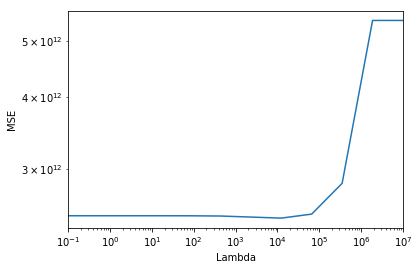

In [11]:
#Plot mean square errors
COL = ['Average MSE']
mse_mean_lasso.columns = COL

#Both axis are logarythmical 
ax = mse_mean_lasso.plot(logx = True, logy = True)
ax.set(xlabel = 'Lambda', ylabel = 'MSE')


### Finding the optimal hyperparameter for Lasso

Where was the mean mse smallest?

In [12]:
mse_mean_lasso.nsmallest(1)

12328.467394    2.459640e+12
dtype: float64

## Train Ridge Regression (K-fold CV)

In [13]:
#Split data into 5 folds
kfolds = KFold(n_splits=5)
folds = list(kfolds.split(X_dev, y_dev))

#Create Lambda values
lambdas = np.logspace(-1, 7, 12)
# outer loop: lambdas
mseCV = []

for lambda_ in tqdm.tqdm(lambdas):    
    # inner loop: folds
    mseCV_ = []

    for train_idx, val_idx in folds:        
        # train model and compute MSE on test fold
        pipe_ridgeCV = make_pipeline(PolynomialFeatures(degree=1, include_bias=True),
                                     StandardScaler(),
                                     Ridge(alpha=lambda_, random_state=1))            
        X_train, y_train = X_dev.iloc[train_idx], y_dev.iloc[train_idx]
        X_val, y_val = X_dev.iloc[val_idx], y_dev.iloc[val_idx] 
        pipe_ridgeCV.fit(X_train, y_train)        
        mseCV_.append(mse(pipe_ridgeCV.predict(X_val), y_val))

        
    # store result    
    mseCV.append(mseCV_) 
    
# convert to DataFrame
lambda_mseCV_ridge = pd.DataFrame(mseCV, index=lambdas)

100%|██████████| 12/12 [00:03<00:00,  3.59it/s]


### MSE of the K-fold Crossvalidation - Ridge

Lambda as index

In [14]:
lambda_mseCV_ridge

,0,1,2,3,4
1.000000e-01,2.275004e+12,4.843170e+12,1.806465e+12,1.812633e+12,1.678910e+12
5.336699e-01,2.275013e+12,4.842948e+12,1.806467e+12,1.812639e+12,1.678904e+12
2.848036e+00,2.275065e+12,4.841763e+12,1.806479e+12,1.812670e+12,1.678874e+12
1.519911e+01,2.275341e+12,4.835451e+12,1.806612e+12,1.812855e+12,1.678712e+12
8.111308e+01,2.276871e+12,4.802637e+12,1.807777e+12,1.813991e+12,1.677875e+12
4.328761e+02,2.286504e+12,4.649027e+12,1.815758e+12,1.821939e+12,1.674603e+12
2.310130e+03,2.349381e+12,4.082544e+12,1.869365e+12,1.881747e+12,1.677256e+12
1.232847e+04,2.647267e+12,2.939718e+12,2.132011e+12,2.195200e+12,1.808064e+12
6.579332e+04,3.389854e+12,2.637053e+12,2.805031e+12,2.984924e+12,2.328854e+12
3.511192e+05,4.562476e+12,3.590687e+12,3.920434e+12,4.184602e+12,3.333509e+12


###  Mean MSE of K-fold CV - Ridge

In [15]:
# Calculates the mean of the folds
mse_mean_ridge = lambda_mseCV_ridge.mean(axis = 1)

### Plot Average MSE over Lambda - Ridge

[Text(0,0.5,'MSE'), Text(0.5,0,'Lambda')]

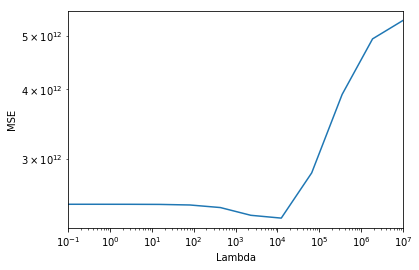

In [16]:
#Plot mean square errors
COL = ['Average MSE']
mse_mean_ridge.columns = COL

#Both axis are logarythmical 
ax = mse_mean_ridge.plot(logx = True, logy = True)
ax.set(xlabel = 'Lambda', ylabel = 'MSE')


### Finding the optimal hyperparameter for Ridge

Where was the mean mse smallest?

In [17]:
mse_mean_ridge.nsmallest(1)

12328.467394    2.344452e+12
dtype: float64

## Train Elastic Net Regression (K-fold CV)

In [18]:
#Split data into 5 folds
kfolds = KFold(n_splits=5)
folds = list(kfolds.split(X_dev, y_dev))

#Create Lambda values
lambdas = np.logspace(-1, 7, 12)
# outer loop: lambdas
mseCV = []

for lambda_ in tqdm.tqdm(lambdas):    
    # inner loop: folds
    mseCV_ = []

    for train_idx, val_idx in folds:        
        # train model and compute MSE on test fold
        pipe_elasticCV = make_pipeline(PolynomialFeatures(degree=1, include_bias=True),
                                     StandardScaler(),
                                     ElasticNet(alpha=lambda_, random_state=1))            
        X_train, y_train = X_dev.iloc[train_idx], y_dev.iloc[train_idx]
        X_val, y_val = X_dev.iloc[val_idx], y_dev.iloc[val_idx] 
        pipe_elasticCV.fit(X_train, y_train)        
        mseCV_.append(mse(pipe_elasticCV.predict(X_val), y_val))

        
    # store result    
    mseCV.append(mseCV_) 
    
# convert to DataFrame
lambda_mseCV_elastic = pd.DataFrame(mseCV, index=lambdas)

100%|██████████| 12/12 [00:04<00:00,  3.26it/s]


### MSE of the K-fold Crossvalidation - Elastic
Lambda as index

In [19]:
lambda_mseCV_elastic

,0,1,2,3,4
1.000000e-01,2.337660e+12,4.166049e+12,1.859240e+12,1.870103e+12,1.675161e+12
5.336699e-01,2.601432e+12,3.042503e+12,2.091270e+12,2.146196e+12,1.782453e+12
2.848036e+00,3.299661e+12,2.598543e+12,2.721710e+12,2.889928e+12,2.258446e+12
1.519911e+01,4.441945e+12,3.475964e+12,3.804056e+12,4.064223e+12,3.225124e+12
8.111308e+01,5.537067e+12,4.556355e+12,4.865881e+12,5.141463e+12,4.232381e+12
4.328761e+02,5.988719e+12,5.017004e+12,5.305043e+12,5.578454e+12,4.657920e+12
2.310130e+03,6.094518e+12,5.125690e+12,5.407936e+12,5.680465e+12,4.758148e+12
1.232847e+04,6.115288e+12,5.147059e+12,5.428136e+12,5.700480e+12,4.777846e+12
6.579332e+04,6.119215e+12,5.151100e+12,5.431955e+12,5.704263e+12,4.781571e+12
3.511192e+05,6.119952e+12,5.151858e+12,5.432671e+12,5.704973e+12,4.782270e+12


###  Mean MSE of K-fold CV - Elastic

In [20]:
# Calculates the mean of the folds
mse_mean_elastic = lambda_mseCV_elastic.mean(axis = 1)

### Plot Average MSE over Elastic Net

[Text(0,0.5,'MSE'), Text(0.5,0,'Lambda')]

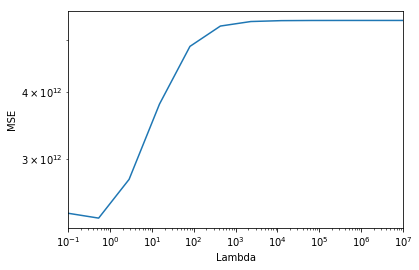

In [21]:
#Plot mean square errors
COL = ['Average MSE']
mse_mean_elastic.columns = COL

#Both axis are logarythmical 
ax = mse_mean_elastic.plot(logx = True, logy = True)
ax.set(xlabel = 'Lambda', ylabel = 'MSE')

### Finding the optimal hyperparameter for Ridge

Where was the mean mse smallest?

In [22]:
mse_mean_elastic.nsmallest(1)

0.53367    2.332771e+12
dtype: float64

# Comparison of Lasso, Ridge, Elastic Net and Linear Regression

Is done after the optimized hyperparameters is found (after training on validation data)
This comparison is done on the **test data!** and is thus the final step in training and selecting our model


In [23]:
# Optimal lambda is inserted into the Lasso-model
optimal_lambda_lasso = lambda_mseCV_lasso.mean(axis=1).nsmallest(1)

# retrain/re-estimate model using optimal hyperparameters
pipe_lassoCV = make_pipeline(PolynomialFeatures(degree = 1, include_bias=False), 
                             StandardScaler(),
                             Lasso(alpha=optimal_lambda_lasso.index[0], random_state=1))
pipe_lassoCV.fit(X_dev,y_dev)

#Optimal lambda for ridge model: 
optimal_lambda_ridge = lambda_mseCV_ridge.mean(axis=1).nsmallest(1)

# retrain/re-estimate model using optimal hyperparameters
pipe_ridgeCV = make_pipeline(PolynomialFeatures(degree = 1, include_bias=False), 
                             StandardScaler(),
                             Lasso(alpha=optimal_lambda_ridge.index[0], random_state=1))
pipe_ridgeCV.fit(X_dev,y_dev)

#Optimal lambda for elastic net model: 
optimal_lambda_elastic = lambda_mseCV_elastic.mean(axis=1).nsmallest(1)

# retrain/re-estimate model using optimal hyperparameters
pipe_elasticCV = make_pipeline(PolynomialFeatures(degree = 1, include_bias=False), 
                             StandardScaler(),
                             ElasticNet(alpha=optimal_lambda_elastic.index[0], random_state=1))
pipe_elasticCV.fit(X_dev,y_dev)

# compare performance by mse
models = {'Lasso CV': pipe_lassoCV, 'Ridge CV': pipe_ridgeCV, 'ElasticNet CV': pipe_elasticCV,
          'LinReg': pipe_lr}
for name, model in models.items():
    score_mse = mse(model.predict(X_test),y_test)
    score_mae = mae(model.predict(X_test),y_test)
    score_rmse = sqrt(mse(model.predict(X_test),y_test))
    
    print("MSE: " + name, round(score_mse, 2))
    print("RMSE: " + name, round(score_rmse, 2))
    print("MAE: " + name, round(score_mae, 2))

MSE: Lasso CV 2059023565977.6
RMSE: Lasso CV 1434929.81
MAE: Lasso CV 668187.27
MSE: Ridge CV 2059023565977.6
RMSE: Ridge CV 1434929.81
MAE: Ridge CV 668187.27
MSE: ElasticNet CV 2299004614620.93
RMSE: ElasticNet CV 1516246.88
MAE: ElasticNet CV 724253.56
MSE: LinReg 2064928666064.05
RMSE: LinReg 1436985.97
MAE: LinReg 676406.17


## Subconclusion

The model is too complex and very unable to predict out-of-sample data. 
Though the Lasso is a great imporvement to the simple linear regression, it still produces error in the realm of trillions. 

## Error Table

We calculate the Mean Absolute Error, Mean Squared Error and Root Mean Squard Errors of the differnet models: OLS (Linear Regression), Lasso, Ridge.

## Correlation plot

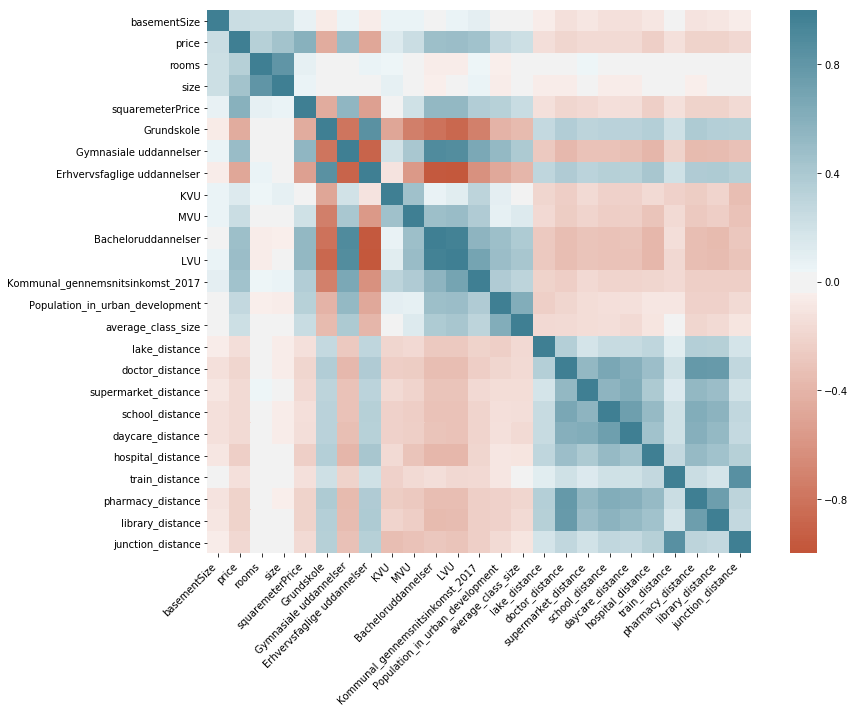

In [24]:
corr = df.corr()
plt.figure(figsize=(14, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);